In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle

In [3]:
# First, we should call some variables from data cleaning process 

%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

In [4]:
# Handle Outlier
# OutLier Detection
# First, let's see the box plot to see the status of data


def box_plot(columns):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.tight_layout
    plt.show()

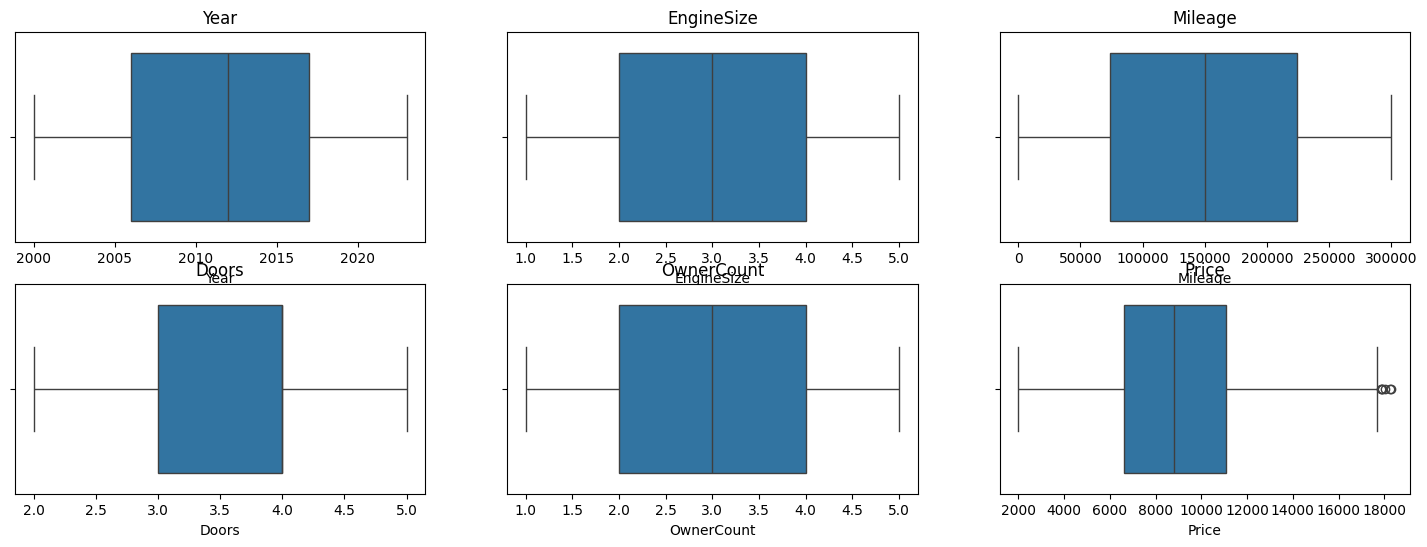

In [5]:
box_plot(numeric_columns[:6])

In [6]:
# We see that there are only a few outliers in Price and since it is the target variable, we can ignore them for now. After applying the appropriate transformations, this issue will be reduced.

In [7]:
#Categorical Encoding

#Mean-Target Encoding
#Since Brand and Model have many unique values (high cardinality), we use Mean Target Encoding for these features.
#Calculate the mean target (Price) for each category.
#Replace each category value with its corresponding mean Price.

In [8]:
# Brand
brand_mean_price = df.groupby('Brand')['Price'].mean()
df['Encoded_Brand'] = df['Brand'].map(brand_mean_price)

# Model
model_mean_price = df.groupby('Model')['Price'].mean()
df['Encoded_Model'] = df['Model'].map(model_mean_price)

# Drop
df.drop(['Brand', 'Model'], axis=1, inplace=True)

In [9]:
with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/Brand_Encoder.pkl', 'wb') as f:
    pickle.dump(brand_mean_price, f)

with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/Model_Encoder.pkl', 'wb') as f:
    pickle.dump(model_mean_price, f)

In [11]:
# One-Hot Encoding
#Now, for Transmission and Fuel, just because they don’t have too many cardinality, we can use one-hot encoding.

# Select categorical columns to encode
categorical_cols = ['Fuel', 'Transmission']

# Define OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform only selected categorical columns
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded ones
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df_encoded, encoded_df], axis=1)


In [12]:
with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/OneHot_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [13]:
%store df

Stored 'df' (DataFrame)
